In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

g:\anaconda\envs\my_tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

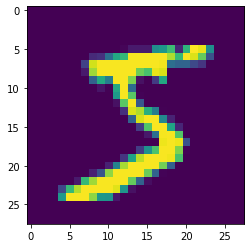

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255

In [6]:
X_test = X_test/255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
28*28

784

In [9]:
784/2

392.0

In [10]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [11]:
25/784

0.03188775510204082

In [14]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [16]:
autoencoder = Sequential([encoder,decoder])

In [17]:
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [19]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 406us/sample - loss: 0.2529 - accuracy: 0.7915 - val_loss: 0.2190 - val_accuracy: 0.7914
Epoch 2/5
60000/60000 [==============================] - 21s 342us/sample - loss: 0.1895 - accuracy: 0.7971 - val_loss: 0.1676 - val_accuracy: 0.8014
Epoch 3/5
60000/60000 [==============================] - 20s 333us/sample - loss: 0.1576 - accuracy: 0.8028 - val_loss: 0.1465 - val_accuracy: 0.8045
Epoch 4/5
60000/60000 [==============================] - 20s 335us/sample - loss: 0.1431 - accuracy: 0.8055 - val_loss: 0.1371 - val_accuracy: 0.8057
Epoch 5/5
60000/60000 [==============================] - 20s 336us/sample - loss: 0.1362 - accuracy: 0.8067 - val_loss: 0.1325 - val_accuracy: 0.8051


In [21]:
passed_images = autoencoder.predict(X_test[:10])

Original Image 


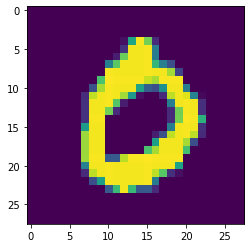

Attempted Reconstruction (After autoencoder)


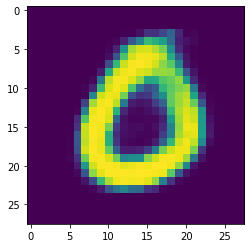

In [24]:
n = 3
print("Original Image ")
plt.imshow(X_test[n])
plt.show()
print('Attempted Reconstruction (After autoencoder)')
plt.imshow(passed_images[n])

In [25]:
from tensorflow.keras.layers import GaussianNoise

In [26]:
sample = GaussianNoise(0.2)

In [27]:
noisey = sample(X_test[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Original 


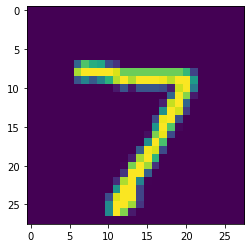

Noisy verision 


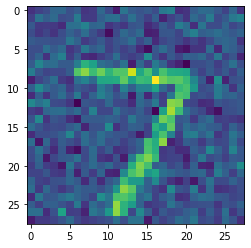

In [28]:
n=0
print('Original ')
plt.imshow(X_test[n])
plt.show()
print("Noisy verision ")
plt.imshow(noisey[n])

In [29]:
import tensorflow as tf

In [31]:
tf.random.set_seed(101)
np.random.seed(101)
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder .add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [32]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [34]:
noise_remover = Sequential([encoder,decoder]) 

In [35]:
noise_remover.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
noise_remover.fit(X_train,X_train,epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 24s 406us/sample - loss: 0.1711 - accuracy: 0.8010
Epoch 2/8
60000/60000 [==============================] - 22s 362us/sample - loss: 0.1301 - accuracy: 0.8078
Epoch 3/8
60000/60000 [==============================] - 22s 362us/sample - loss: 0.1232 - accuracy: 0.8091
Epoch 4/8
60000/60000 [==============================] - 23s 379us/sample - loss: 0.1167 - accuracy: 0.8102
Epoch 5/8
60000/60000 [==============================] - 23s 387us/sample - loss: 0.1125 - accuracy: 0.8110
Epoch 6/8
60000/60000 [==============================] - 23s 387us/sample - loss: 0.1097 - accuracy: 0.8114
Epoch 7/8
60000/60000 [==============================] - 22s 365us/sample - loss: 0.1079 - accuracy: 0.8117
Epoch 8/8
60000/60000 [==============================] - 22s 368us/sample - loss: 0.1064 - accuracy: 0.8119


In [37]:
ten_noisy_images = sample(X_test[:10],training=True)

In [38]:
denoised = noise_remover(ten_noisy_images)

In [ ]:
n=0

print("ORIGINAL IMAGE ")
plt.imshow(X_test[n])
plt.show()
print("NOISE ADDED IMAGE ")
plt.imshow(X_test[n])
plt.show()
print("AFTER NOISE REMOVAL FROM AUTOENCODER")
plt.imshow(X_test[n])
plt.show()

